In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
inpatients = pd.read_csv('inpatientCharges.csv')

In [3]:
inpatients.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


In [4]:
inpatients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
DRG Definition                          163065 non-null object
Provider Id                             163065 non-null int64
Provider Name                           163065 non-null object
Provider Street Address                 163065 non-null object
Provider City                           163065 non-null object
Provider State                          163065 non-null object
Provider Zip Code                       163065 non-null int64
Hospital Referral Region Description    163065 non-null object
 Total Discharges                       163065 non-null int64
 Average Covered Charges                163065 non-null object
 Average Total Payments                 163065 non-null object
Average Medicare Payments               163065 non-null object
dtypes: int64(3), object(9)
memory usage: 14.9+ MB


In [5]:
inpatients.isnull().sum()

DRG Definition                          0
Provider Id                             0
Provider Name                           0
Provider Street Address                 0
Provider City                           0
Provider State                          0
Provider Zip Code                       0
Hospital Referral Region Description    0
 Total Discharges                       0
 Average Covered Charges                0
 Average Total Payments                 0
Average Medicare Payments               0
dtype: int64

In [6]:
inpatients.describe()

,Provider Id,Provider Zip Code,Total Discharges
count,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304
std,151563.671767,27854.323080,51.104042
min,10001.000000,1040.000000,11.000000
25%,110092.000000,27261.000000,17.000000
50%,250007.000000,44309.000000,27.000000
75%,380075.000000,72901.000000,49.000000
max,670077.000000,99835.000000,3383.000000


In [7]:
inpatients['Average Medicare Payments'] = inpatients['Average Medicare Payments'].apply(lambda money: money.split('$')[1])

In [8]:
inpatients['Average Medicare Payments'] = inpatients['Average Medicare Payments'].astype(float)

In [9]:
inpatients['Average Medicare Payments'].dtype

dtype('float64')

In [10]:
inpatients.rename({' Average Covered Charges ':'Average Covered Charges',' Average Total Payments ':'Average Total Payments'},axis='columns',inplace=True)

In [11]:
inpatients['Average Covered Charges'] = inpatients['Average Covered Charges'].apply(lambda money: money.split('$')[1])

In [12]:
inpatients['Average Covered Charges'] = inpatients['Average Covered Charges'].astype(float)

In [13]:
inpatients['Average Total Payments'] = inpatients['Average Total Payments'].apply(lambda money: money.split('$')[1])

In [14]:
inpatients['Average Total Payments'] = inpatients['Average Total Payments'].astype(float)

In [15]:
inpatients.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44


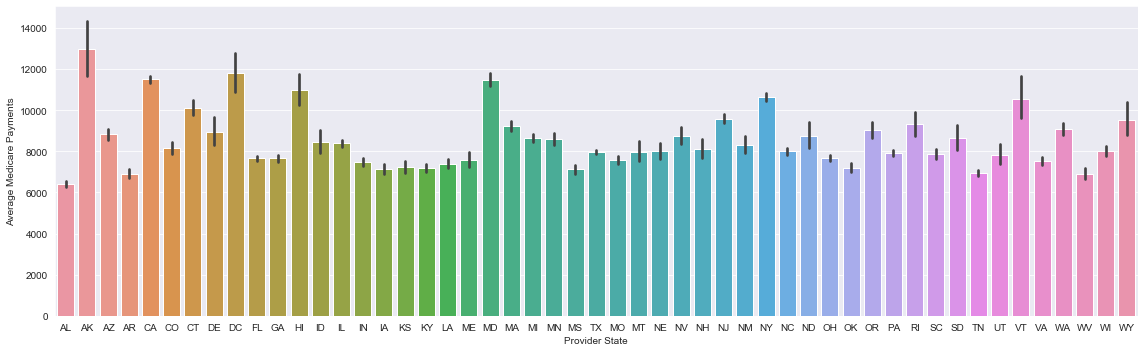

In [16]:
plt.figure(figsize= (16,5))
sns.barplot(x='Provider State',y='Average Medicare Payments',data=inpatients)
plt.tight_layout()

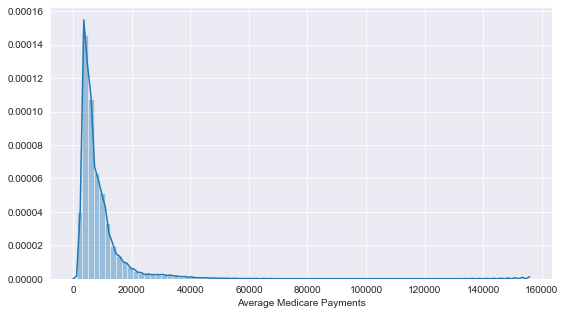

In [17]:
plt.figure(figsize = (9,5))
sns.distplot(inpatients['Average Medicare Payments'],bins=80)

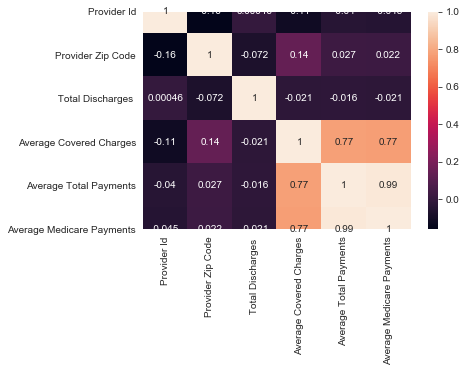

In [26]:
sns.heatmap(inpatients.corr(),annot=True)
sns.

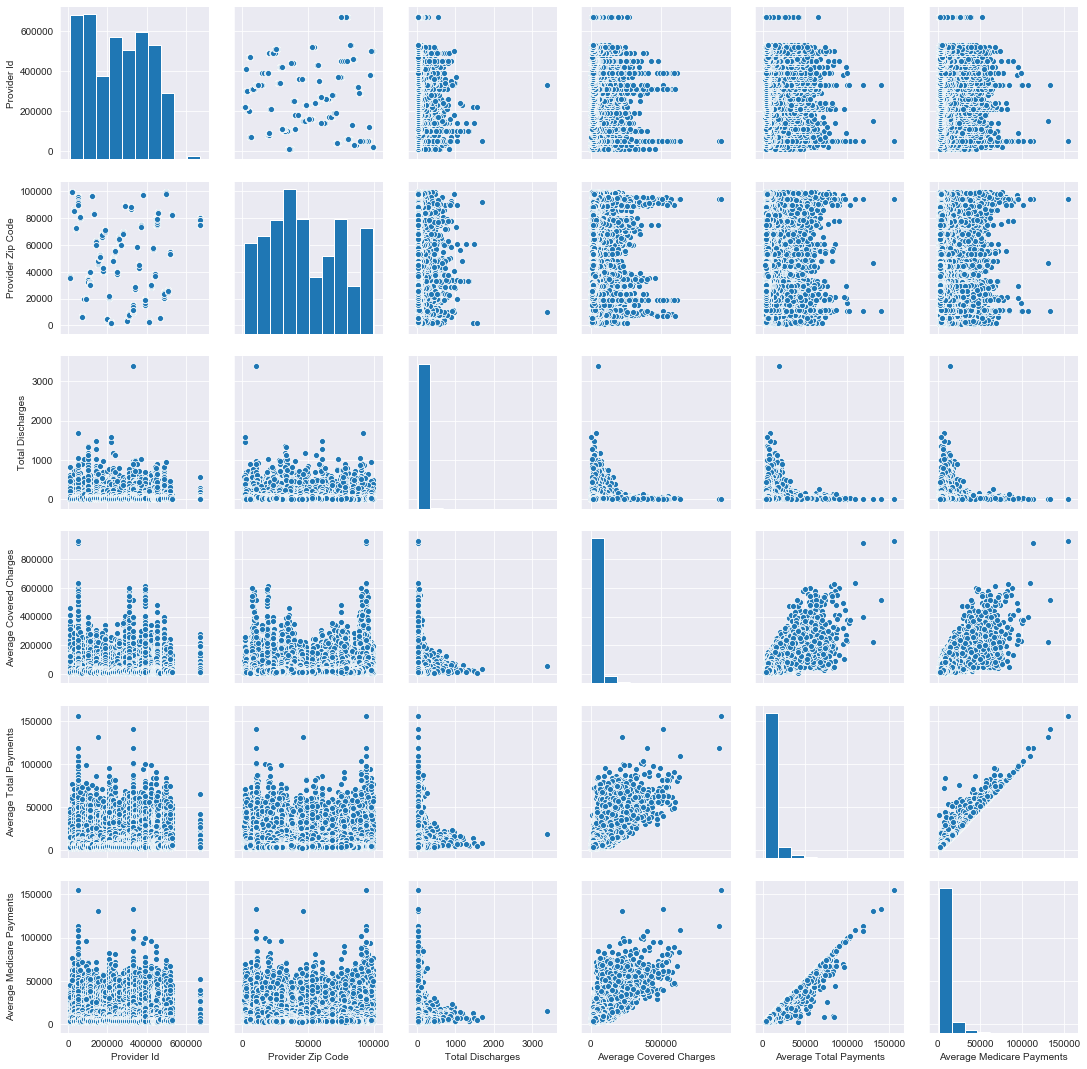

In [19]:
sns.pairplot(inpatients)

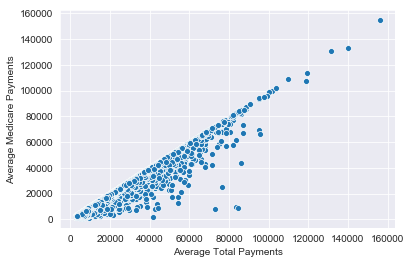

In [20]:
sns.scatterplot(y='Average Medicare Payments',x= 'Average Total Payments',data=inpatients)

In [23]:
inpatients = inpatients.select_dtypes(include=['float64','int64'])

In [24]:
inpatients.head()

,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,10001,36301,91,32963.07,5777.24,4763.73
1,10005,35957,14,15131.85,5787.57,4976.71
2,10006,35631,24,37560.37,5434.95,4453.79
3,10011,35235,25,13998.28,5417.56,4129.16
4,10016,35007,18,31633.27,5658.33,4851.44


In [34]:
inpatients.drop(['Provider Id','Provider Zip Code',' Total Discharges '],inplace=True,axis=1)

In [35]:
inpatients.head()

,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,32963.07,5777.24,4763.73
1,15131.85,5787.57,4976.71
2,37560.37,5434.95,4453.79
3,13998.28,5417.56,4129.16
4,31633.27,5658.33,4851.44


In [37]:
X = inpatients.iloc[:,:2]

In [38]:
y = inpatients['Average Medicare Payments']

### TRAIN TEST SPLIT THE MODEL

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### MIN MAX SCALER

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
ms = MinMaxScaler()

In [44]:
X_train = ms.fit_transform(X_train)

In [45]:
X_test = ms.transform(X_test)

### BUILD THE MODEL

In [46]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

In [52]:
model = keras.Sequential([
    Dense(32,activation='relu',input_shape =[len(X.columns)]),
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    Dense(1,activation='relu')
])

In [53]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 6,433
Trainable params: 6,433
Non-trainable params: 0
_________________________________________________________________


In [56]:
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss",patience=10,verbose=1)
history = model.fit(
  X_train, y_train,batch_size=10,
  epochs=100, validation_split = 0.1,callbacks=[early_stop])

Train on 102730 samples, validate on 11415 samples
Epoch 1/100
102730/102730 [==============================] - 56s 544us/step - loss: 18285731.2827 - mean_absolute_error: 2106.6118 - mean_squared_error: 18285731.2827 - val_loss: 1050067.3226 - val_mean_absolute_error: 483.9230 - val_mean_squared_error: 1050067.3226
Epoch 2/100
102730/102730 [==============================] - 37s 360us/step - loss: 1196657.8946 - mean_absolute_error: 520.2851 - mean_squared_error: 1196657.8946 - val_loss: 1038125.9817 - val_mean_absolute_error: 457.7825 - val_mean_squared_error: 1038125.9817
Epoch 3/100
102730/102730 [==============================] - 37s 363us/step - loss: 1193996.9866 - mean_absolute_error: 519.2820 - mean_squared_error: 1193996.9866 - val_loss: 1019185.6875 - val_mean_absolute_error: 506.0065 - val_mean_squared_error: 1019185.6875
Epoch 4/100
102730/102730 [==============================] - 38s 367us/step - loss: 1195373.9646 - mean_absolute_error: 518.8586 - mean_squared_error: 119

In [57]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
19,1.011229e+06,513.646781,1.011229e+06,1.193328e+06,519.776758,1.193328e+06,19
20,1.013461e+06,517.592308,1.013461e+06,1.191533e+06,520.281645,1.191533e+06,20
21,1.045613e+06,571.425408,1.045613e+06,1.195356e+06,519.217448,1.195356e+06,21
22,1.036479e+06,556.265797,1.036479e+06,1.194705e+06,519.349212,1.194705e+06,22
23,1.051104e+06,449.140962,1.051104e+06,1.191355e+06,519.238237,1.191355e+06,23


## plot the error

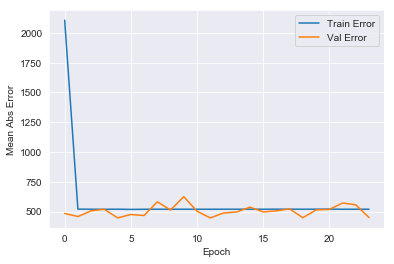

In [58]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
plt.legend()

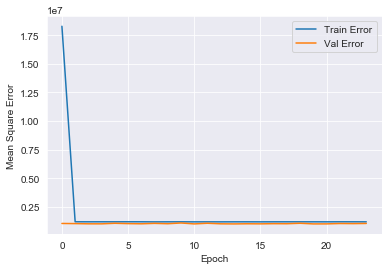

In [59]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
plt.legend()

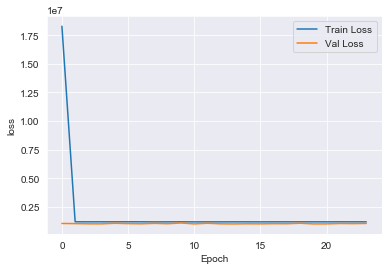

In [60]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.plot(hist['epoch'], hist['loss'],
           label='Train Loss')
plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Loss')
plt.legend()

In [61]:
loss, mae, mse = model.evaluate(X_test,y_test)

print("Testing set Mean Abs Error: {:5.2f}".format(mae))

test_predictions = model.predict(X_test).flatten()

48920/48920 [==============================] - 2s 40us/step
Testing set Mean Abs Error: 473.70


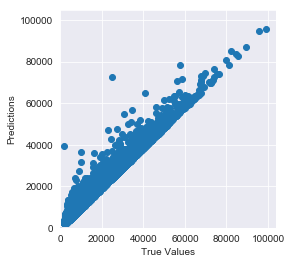

In [63]:
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [64]:
from sklearn.metrics import r2_score

In [ ]:
r2_score()